In [1]:
import sys
sys.path.append('../../Hallgerd/')
import gunnar
import hallgerd
from gunnar.core import Device

import numpy as np
import pylab as plt

devices = Device.getDevices()
dnames = [d for d in devices]
print('Found devices:\n\t{}'.format('\n\t'.join(dnames)))
print('\nUsing ', dnames[0])
gpu = Device([devices[dnames[0]]], DTYPE=np.float32, CTS=32, IBS=4, TS=32, TSK=32, WPTM=4, WPTN=4, TSM=128, TSN=128)

Found devices:
	GeForce GTX 660

Using  GeForce GTX 660


In [2]:
kernel = np.arange(25*6).reshape(3,2,5,5)
x = np.arange(625*2).reshape(1,2,25,25)
y = np.arange(625*3,0,-1).reshape(1,3,25,25)

gx = gpu.image(x.reshape(-1,1), (25,25), (2,))
gy = gpu.image(y.reshape(-1,1), (25,25), (3,))
gk = gpu.image(kernel.reshape(-1,1), (5,5), (3,2))

In [3]:
out = gx.conv2d(gk, padding=0)

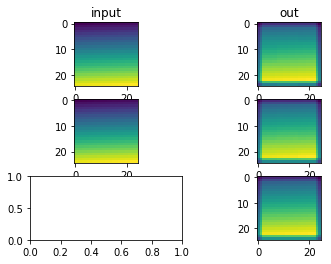

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax[0,0].imshow(x[0,0])
ax[0,0].set_title('input')
ax[1,0].imshow(x[0,1])
ax[0,1].set_title('out')
ax[0,1].imshow(out.to_cpu().reshape(1,3,25,25)[0,0])
ax[1,1].imshow(out.to_cpu().reshape(1,3,25,25)[0,1])
ax[2,1].imshow(out.to_cpu().reshape(1,3,25,25)[0,2])
plt.show()

In [5]:
fxs = gx.image_shape[0] * 2 - 1
fys = gx.image_shape[1] * 2 - 1
xpad = (fxs - gk.image_shape[0]) // 2
ypad = (fys - gk.image_shape[1]) // 2
xarea = (xpad, fxs - xpad)
yarea = (ypad, fys - ypad)
dkernel = gy.dconv2d(gx, area=(xarea, yarea), padding=0)
dx = gy.conv2d(gk, padding=0, reverse=True)

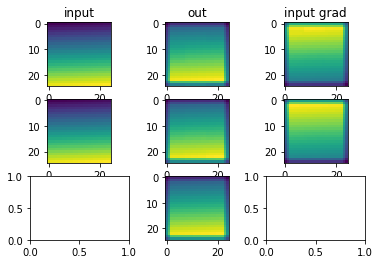

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3)

ax[0,0].set_title('input')
ax[0,0].imshow(x[0,0])
ax[1,0].imshow(x[0,1])
ax[0,1].set_title('out')
ax[0,1].imshow(out.to_cpu().reshape(1,3,25,25)[0,0])
ax[1,1].imshow(out.to_cpu().reshape(1,3,25,25)[0,1])
ax[2,1].imshow(out.to_cpu().reshape(1,3,25,25)[0,2])
ax[0,2].set_title('input grad')
ax[0,2].imshow(dx.to_cpu().reshape(1,2,25,25)[0,0])
ax[1,2].imshow(dx.to_cpu().reshape(1,2,25,25)[0,1])

plt.show()

In [7]:
dkernel.to_cpu().reshape(3,2,5,5).shape

(3, 2, 5, 5)

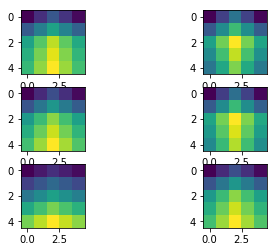

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax[0,0].imshow(dkernel.to_cpu().reshape(3,2,5,5)[0,0])
ax[1,0].imshow(dkernel.to_cpu().reshape(3,2,5,5)[1,0])
ax[2,0].imshow(dkernel.to_cpu().reshape(3,2,5,5)[2,0])
ax[0,1].imshow(dkernel.to_cpu().reshape(3,2,5,5)[0,1])
ax[1,1].imshow(dkernel.to_cpu().reshape(3,2,5,5)[1,1])
ax[2,1].imshow(dkernel.to_cpu().reshape(3,2,5,5)[2,1])
plt.show()